# Description


Here we are provided with a datset which conatins prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

Size of training set: 10683 records

Size of test set: 2671 records
 In The datset We have been provided with following features..

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

We have to train a machine learning model which can predict the flight price given the details about following features.

As the flight fare is continous in nature we will move ahead with regression approach.

Lets Begin...!!!

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
flight_train=pd.read_excel('flight_price_train.xlsx')
flight_test=pd.read_excel('flight_price_test.xlsx')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Overviewing Train and Test Datasets

In [4]:
# Checking Train Datset

flight_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
flight_train.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
# Checking Test Dataset

flight_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [13]:
flight_test.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2661,Jet Airways,27/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,04:25 29 Mar,33h 15m,2 stops,No info
2662,Air India,21/05/2019,Mumbai,Hyderabad,BOM → HYD,13:55,15:25,1h 30m,non-stop,No info
2663,GoAir,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,23:30,07:45 13 May,8h 15m,1 stop,No info
2664,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:30 16 Jun,10h 15m,1 stop,No info
2665,SpiceJet,21/06/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 22 Jun,1h 30m,non-stop,No check-in baggage included
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [14]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [16]:
flight_train.shape

(10683, 11)

In [17]:
flight_test.shape

(2671, 10)

We have 10683 Rows and 11 columns for Train Dataset and 2671 Rows and 10 Columns for Test Dataset.

In [19]:
# Checking datatypes

flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
flight_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Checking Null Values

In [80]:
# For Train Data

flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [81]:
# For Test Data

flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

We have only one null value in Training dataset.Thus we will drop it.

In [4]:
# Dropping Null Values

flight_train=flight_train.dropna()

# Feature Engineering

We will convert Date of Journey column to Datetime type and extract day,month and year to separate columns.

Same we will do with departure and arrival time columns.

We will remove string from Duration columns and convert all the values to minutes.

In [5]:
# Converting to Timedate type and extracting to separate columns

# for Train Dataset

import datetime


In [6]:
flight_train['Date_of_Journey']=pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Dep_Time']=pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time']=pd.to_datetime(flight_train['Arrival_Time'])

In [7]:
# Extracting to separate columns

flight_train['Day']=flight_train['Date_of_Journey'].dt.day
flight_train['Month']=flight_train['Date_of_Journey'].dt.month
flight_train['Year']=flight_train['Date_of_Journey'].dt.year
flight_train['Dep_Hours']=flight_train['Dep_Time'].dt.hour
flight_train['Dep_Minutes']=flight_train['Dep_Time'].dt.minute
flight_train['Arrival_Hours']=flight_train['Arrival_Time'].dt.hour
flight_train['Arrival_Minutes']=flight_train['Arrival_Time'].dt.minute

In [10]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-11 05:50:00,2021-04-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-11 18:05:00,2021-04-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-11 16:50:00,2021-04-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [8]:
# For Test Dataset

flight_test['Date_of_Journey']=pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Dep_Time']=pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time']=pd.to_datetime(flight_test['Arrival_Time'])

In [9]:
# Extracting to separate columns

flight_test['Day']=flight_test['Date_of_Journey'].dt.day
flight_test['Month']=flight_test['Date_of_Journey'].dt.month
flight_test['Year']=flight_test['Date_of_Journey'].dt.year
flight_test['Dep_Hours']=flight_test['Dep_Time'].dt.hour
flight_test['Dep_Minutes']=flight_test['Dep_Time'].dt.minute
flight_test['Arrival_Hours']=flight_test['Arrival_Time'].dt.hour
flight_test['Arrival_Minutes']=flight_test['Arrival_Time'].dt.minute

In [99]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-11 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-11 06:20:00,2021-04-11 10:20:00,4h,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-11 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-11 08:00:00,2021-04-11 21:00:00,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-11 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [10]:
# Dropping Columns from Datasets

flight_train=flight_train.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)
flight_test=flight_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)

In [14]:
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [15]:
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


Treating Duration column for Training Dataset

In [64]:
flight_train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h         62
11h 45m     62
1h 20m      61
14h 25m     61
6h 35m      60
22h 55m     57
10h 30m     57
12h 10m     57
12h 45m     56
5h 45m      54
16h 5m      53
7h 20m      52
11h 30m     52
12h 30m     52
15h 10m     51
4h 55m      51
8h 25m      50
10h 15m     50
10h         49
12h         49
10h 25m     49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
26h 55m     44
13h         42
14h 5m      42
9h 15m      42
8h 55m      42
20h 10m     41
9h 35m      41
9h 20m      41
3h 10m      40
17h 5m      40
23h 40m     39
26h 35m     39
21h 15m     39
6h 30m    

We observe an unusual entry in duration which is '5m'. Lets check which row it represents.  

In [16]:
flight_train[flight_train['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55


Its a flight from Mumbai to hyderabad having two stops. Duration of 5m is not possible. Lets check if we have same route and Price for other entries.

In [17]:
flight_train[flight_train['Route']=='BOM → GOI → PNQ → HYD']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,4h 15m,2 stops,No info,16172,3,12,2019,21,10,16,55
5309,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,4h 15m,2 stops,No info,17327,3,6,2019,21,10,16,55
5942,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,11h 50m,2 stops,No info,16172,3,12,2019,5,5,16,55
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55
7456,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,11h 50m,2 stops,No info,16697,3,6,2019,5,5,16,55
8478,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,3h 25m,2 stops,No info,18797,3,6,2019,13,30,16,55


Row no 6474 represents the faulty entry. Duration should be '4h 15m'. We will replcae the faulty value with '4h 15m'

In [11]:
# We will replace error data

flight_train.loc[(flight_train.Duration=='5m'),'Duration']='4h 15m'

As the value is replaced lets extract hours and minutes from duration, convert it to minutes and place in a new column Duration_f.

In [12]:
flight_train['Dura_h']=flight_train['Duration'].str.split().str[0].str.replace('h','')
flight_train['Dura_m']=flight_train['Duration'].str.split().str[1].str.replace('m','')
flight_train['Dura_m']=flight_train['Dura_m'].fillna(0)
flight_train['Dura_h']=flight_train['Dura_h'].astype('int32')
flight_train['Dura_m']=flight_train['Dura_m'].astype('int32')
flight_train['Duration_f']=(flight_train['Dura_h']*60)+flight_train['Dura_m']

In [105]:
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Dura_h,Dura_m,Duration_f
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


Treating the duration column for Test Dataset

In [106]:
flight_test.Duration.value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
2h 35m      70
2h 30m      58
2h 20m      48
2h 40m      38
13h 20m     32
5h 15m      29
2h 15m      29
1h 25m      24
2h 25m      24
9h 20m      22
13h 30m     22
10h 15m     22
1h 20m      20
14h 5m      20
3h 15m      20
7h 30m      19
13h         18
7h 35m      18
12h 30m     18
11h         18
6h 25m      17
11h 45m     17
3h 5m       17
9h 30m      17
10h 25m     17
8h          16
5h 30m      16
5h 45m      16
8h 25m      16
12h 10m     16
8h 40m      16
10h         15
12h 45m     15
22h 55m     15
7h 15m      15
11h 30m     14
8h 30m      14
23h 40m     14
9h          14
6h 35m      14
6h 20m      14
15h 10m     13
4h 50m      13
5h          13
18h 45m     12
7h 5m       12
12h 15m     12
5h 20m      12
6h 15m      12
27h 35m     12
12h 25m     12
10h 30m     12
11h 15m     12
18h 20m     12
9h 50m      12
14h         12
19h 25m     12
26h 20m     11
7h 20m      11
3h 10m      11
9h 45m      11
7h 45m    

Same faulty entry in test dataset as well

In [13]:
flight_test[flight_test['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,3,12,2019,16,50,16,55


In [14]:
# Replacing with '4h 15m'

flight_test.loc[(flight_test.Duration=='5m'),'Duration']='4h 15m'

As the value is replaced lets extract hours and minutes from duration, convert it to minutes and place in a new column Duration_f.

In [15]:
flight_test['Dura_h']=flight_test['Duration'].str.split().str[0].str.replace('h','')
flight_test['Dura_m']=flight_test['Duration'].str.split().str[1].str.replace('m','')
flight_test['Dura_m']=flight_test['Dura_m'].fillna(0)
flight_test['Dura_h']=flight_test['Dura_h'].astype('int32')
flight_test['Dura_m']=flight_test['Dura_m'].astype('int32')
flight_test['Duration_f']=(flight_test['Dura_h']*60)+flight_train['Dura_m']

In [23]:
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Dura_h,Dura_m,Duration_f
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,10,55,650.0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,2019,6,20,10,20,4,0,265.0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45,1380.0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0,13,0,805.0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,2,50,165.0


In [16]:
flight_test['Duration_f']=flight_test['Duration_f'].astype('int32')

Dropping Duration, Dura_h and Dura_m columns from training and test dataset

In [17]:
flight_train=flight_train.drop(['Duration','Dura_h','Dura_m'],axis=1)
flight_test=flight_test.drop(['Duration','Dura_h','Dura_m'],axis=1)

# Exploring Categorical Columns

Checking Value Counts in Training Dataset

In [116]:
flight_train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [119]:
flight_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [120]:
flight_train.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In total stops We will replace Non-Stop, 1-Stop, 2-Stops, 3-Stops and 4-Stops with 0,1,2,3 and 4.

For additional column we will replace 'No Info' with 'No info' as they represent same thing.

In [18]:
# Total_Stops

flight_train['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

# Additional Info

flight_train["Additional_Info"] = flight_train["Additional_Info"].replace('No Info','No info')

In [122]:
flight_train.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [123]:
flight_train.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Visualizing Counts

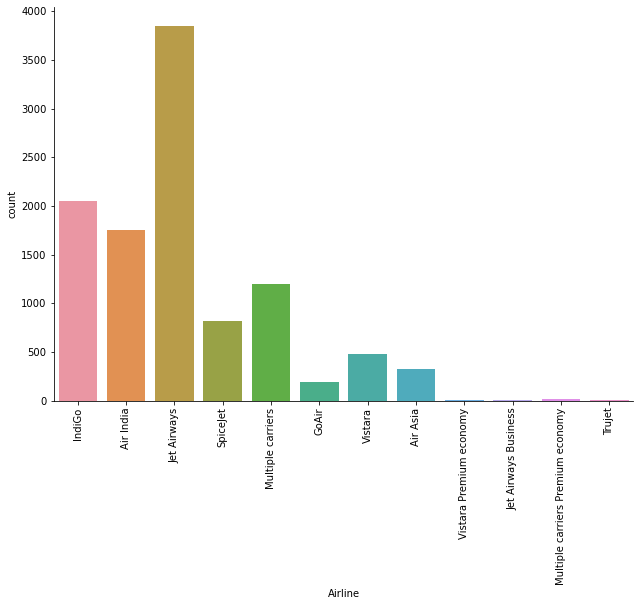

Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64

In [34]:
sns.catplot(x='Airline',data=flight_train,kind='count',ax=ax,height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

flight_train.Airline.value_counts(normalize=True)*100

Highest share is of Jet Airways. Indigo and Air India has 19.2% and 16.3% flights.

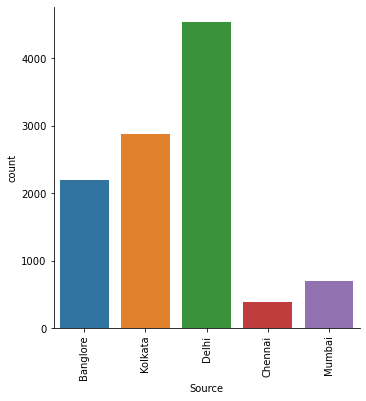

Delhi       42.463958
Kolkata     26.876989
Banglore    20.567309
Mumbai       6.524995
Chennai      3.566748
Name: Source, dtype: float64

In [26]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Source',data=flight_train,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_train.Source.value_counts(normalize=True)*100

42.4% flights took of from Delhi. 26.8% from kolkata and 20.5% from Banglore. Delhi has the busiest terminal while Chennai has the least no of flights taking off.

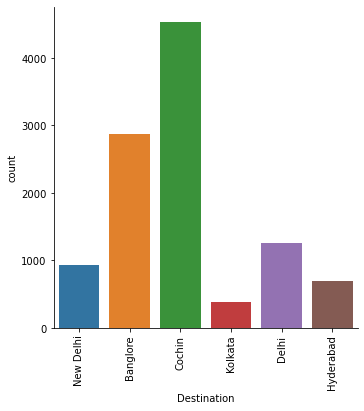

Cochin       42.463958
Banglore     26.876989
Delhi        11.842352
New Delhi     8.724958
Hyderabad     6.524995
Kolkata       3.566748
Name: Destination, dtype: float64

In [27]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Destination',data=flight_train,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_train.Destination.value_counts(normalize=True)*100

Coachin has the highest share in arriving flights which is 42.4%. Banglore has 26.8%. Delhi is on top in terms of flght taking off but for incoming flight it is at 3rd spot with 11.8%.

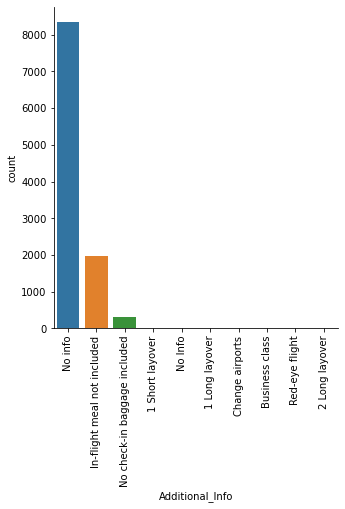

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
Red-eye flight                   0.009362
1 Short layover                  0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [32]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Additional_Info',data=flight_train,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_train.Additional_Info.value_counts(normalize=True)*100

For most of the flights there is no aditional info available.

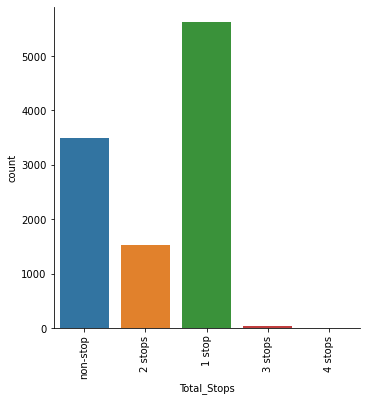

1 stop      52.658678
non-stop    32.681146
2 stops     14.229545
3 stops      0.421269
4 stops      0.009362
Name: Total_Stops, dtype: float64

In [35]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Total_Stops',data=flight_train,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_train.Total_Stops.value_counts(normalize=True)*100

52.6% flights has only 1 stop on there route. 32.6% are non stop flights while 14.2 has 2 stops. Flights having 3 or 4 stops are very rare.

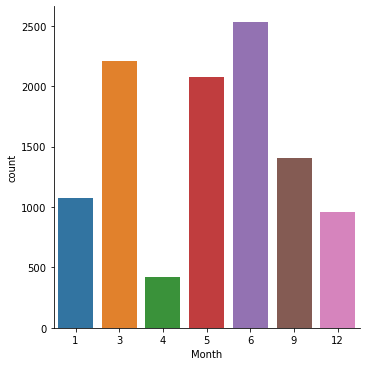

6     23.731511
3     20.698371
5     19.415840
9     13.162329
1     10.063658
12     8.958996
4      3.969294
Name: Month, dtype: float64

In [27]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Month',data=flight_train,kind='count',ax=ax)

plt.show()

flight_train.Month.value_counts(normalize=True)*100

6th month see more number of flights followed by 3rd and 5th month.

# Bivariate Analysis

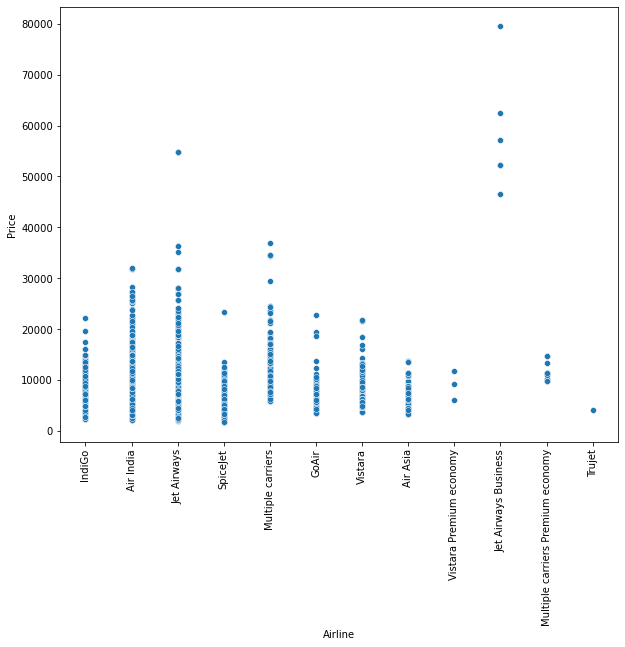

In [20]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=flight_train['Airline'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

High prices are observed for Jet Airways Business flight. This is obvious.

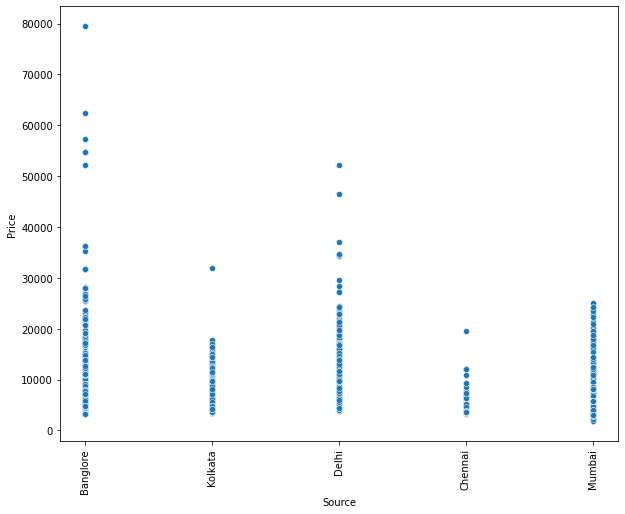

In [21]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=flight_train['Source'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

Flight prices from Banglore is high followed by Delhi.

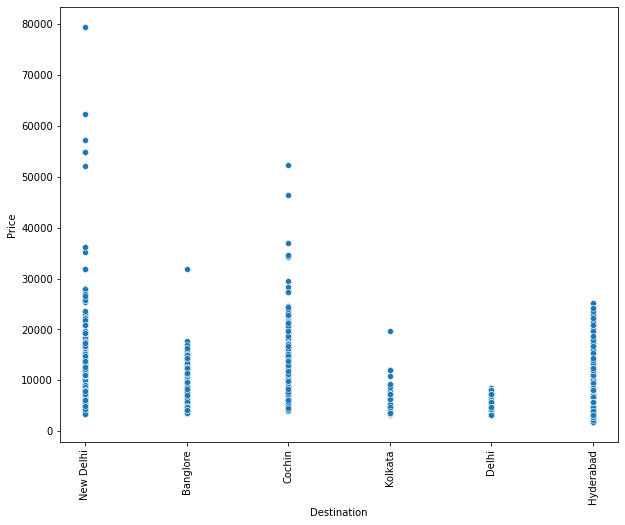

In [22]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=flight_train['Destination'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

Usually flights going to Delhi are costliers. Cochin is second costliest.

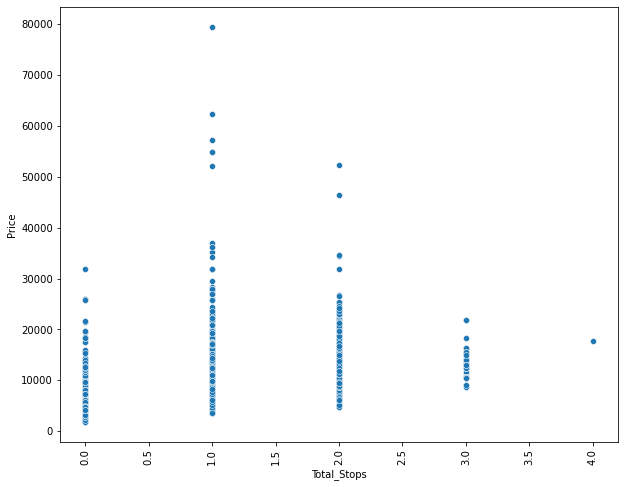

In [35]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=flight_train['Total_Stops'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

Usually Flight with 1-stop has highest prices. Non-Stop flights are normally cheaper.

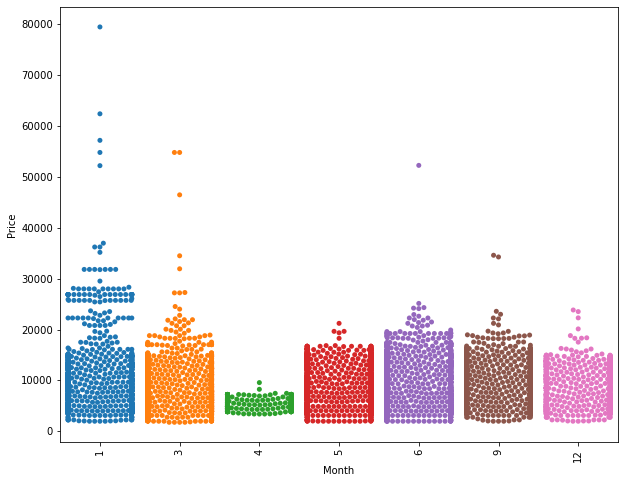

In [36]:
fig,ax=plt.subplots(figsize=(10,8))
sns.swarmplot(x=flight_train['Month'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

5th to 12th month have similar price pattern for flights despite of high number of flights in 6th month. 4th month usually have less flights so the price is cheaper. 1st and 2nd month show high prices.

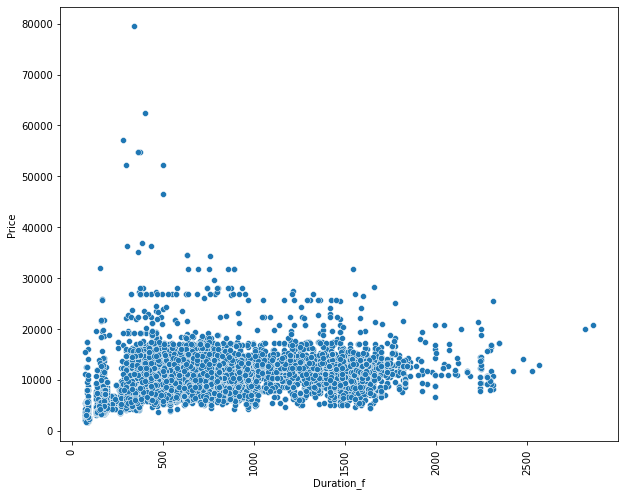

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=flight_train['Duration_f'],y=flight_train['Price'],ax=ax)
plt.xticks(rotation=90)
plt.show()

No direct impact of flight duration on Price.

# Exploring categorical columns in Test dataset

In [125]:
flight_test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [124]:
flight_test.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In total stops We will replace Non-Stop,1-Stop,2-Stops,3-Stops and 4-Stops with 0,1,2,3 and 4.

In [42]:
# Total_Stops

flight_test['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [127]:
flight_test.Total_Stops.value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

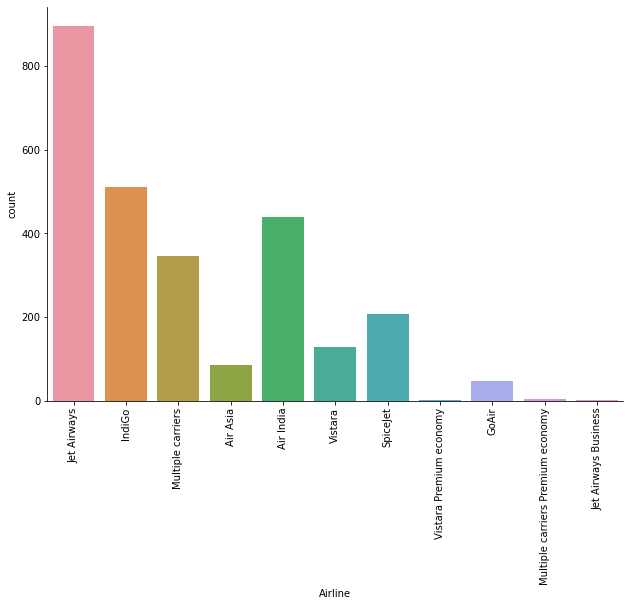

Jet Airways                          33.582928
IndiGo                               19.131411
Air India                            16.473231
Multiple carriers                    12.991389
SpiceJet                              7.787346
Vistara                               4.829652
Air Asia                              3.219768
GoAir                                 1.722201
Multiple carriers Premium economy     0.112317
Jet Airways Business                  0.074878
Vistara Premium economy               0.074878
Name: Airline, dtype: float64

In [37]:
sns.catplot(x='Airline',data=flight_test,kind='count',ax=ax,height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

flight_test.Airline.value_counts(normalize=True)*100

In test data as well Jet has highest number of flights followed by Indigo and Air India Airlines

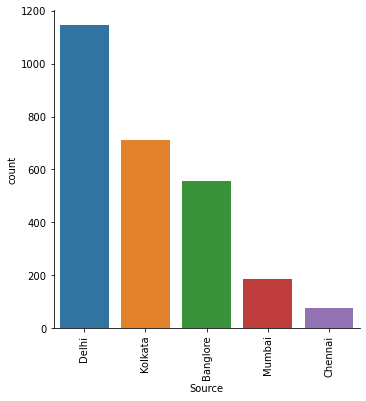

Delhi       42.867840
Kolkata     26.581805
Banglore    20.778735
Mumbai       6.963684
Chennai      2.807937
Name: Source, dtype: float64

In [38]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Source',data=flight_test,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_test.Source.value_counts(normalize=True)*100

Flights with Delhi as the source are more i.e 42.8%. Kolkata and Banglore has 26.5% and 20.7% flights taking off.

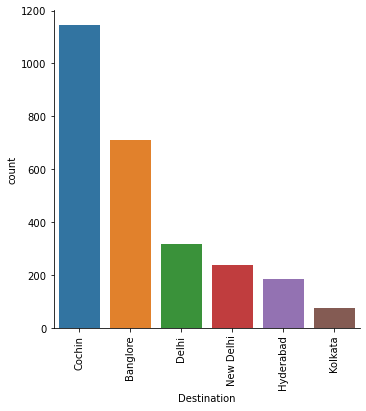

Cochin       42.867840
Banglore     26.581805
Delhi        11.868214
New Delhi     8.910520
Hyderabad     6.963684
Kolkata       2.807937
Name: Destination, dtype: float64

In [39]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Destination',data=flight_test,kind='count',ax=ax)
plt.xticks(rotation=90)
plt.show()

flight_test.Destination.value_counts(normalize=True)*100

As for destination, test data also shows Cochin as the receiver of most number of flights. 42.8% lands in Cochin. Banglore has 26.5% and Delhi has 11.8%.

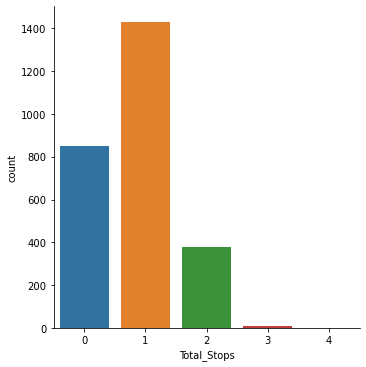

1    53.575440
0    31.785848
2    14.189442
3     0.411831
4     0.037439
Name: Total_Stops, dtype: float64

In [43]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Total_Stops',data=flight_test,kind='count',ax=ax)
plt.show()

flight_test.Total_Stops.value_counts(normalize=True)*100

Flights with single stop is more followed by Non Stop flights.

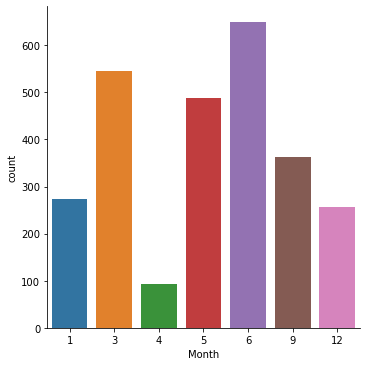

6     24.335455
3     20.404343
5     18.307750
9     13.590416
1     10.258330
12     9.621864
4      3.481842
Name: Month, dtype: float64

In [44]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Month',data=flight_test,kind='count',ax=ax)

plt.show()

flight_test.Month.value_counts(normalize=True)*100

Similar Pattern as Train data.

# Encoding

In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [46]:
# For Training Dataset

for i in flight_train.columns:
    if flight_train[i].dtypes=='O':
        flight_train[i]=oe.fit_transform(flight_train[i].values.reshape(-1,1))

In [47]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_f
0,3.0,0.0,5.0,18.0,0,7.0,3897,24,3,2019,22,20,1,10,170
1,1.0,3.0,0.0,84.0,2,7.0,7662,5,1,2019,5,50,13,15,445
2,4.0,2.0,1.0,118.0,2,7.0,13882,6,9,2019,9,25,4,25,1140
3,3.0,3.0,0.0,91.0,1,7.0,6218,5,12,2019,18,5,23,30,325
4,3.0,0.0,5.0,29.0,1,7.0,13302,3,1,2019,16,50,21,35,285


In [48]:
# For Test Dataset

for j in flight_test.columns:
    if flight_test[j].dtypes=='O':
        flight_test[j]=oe.fit_transform(flight_test[j].values.reshape(-1,1))

In [49]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_f
0,4.0,2.0,1.0,76.0,1,5.0,6,6,2019,17,30,4,25,650
1,3.0,3.0,0.0,65.0,1,5.0,5,12,2019,6,20,10,20,265
2,4.0,2.0,1.0,76.0,1,3.0,21,5,2019,19,15,19,0,1380
3,6.0,2.0,1.0,76.0,1,5.0,21,5,2019,8,0,21,0,805
4,0.0,0.0,2.0,16.0,0,5.0,24,6,2019,23,55,2,45,165


# Splitting Input and Target variable

In [50]:
x=flight_train.drop(['Price'],axis=1)
y=flight_train['Price']
print(x.head(10))
print(y.head(10))
print(x.shape)
print(y.shape)

   Airline  Source  Destination  Route  Total_Stops  Additional_Info  Day  \
0      3.0     0.0          5.0   18.0            0              7.0   24   
1      1.0     3.0          0.0   84.0            2              7.0    5   
2      4.0     2.0          1.0  118.0            2              7.0    6   
3      3.0     3.0          0.0   91.0            1              7.0    5   
4      3.0     0.0          5.0   29.0            1              7.0    3   
5      8.0     3.0          0.0   64.0            0              7.0   24   
6      4.0     0.0          5.0    5.0            1              5.0    3   
7      4.0     0.0          5.0    5.0            1              7.0    3   
8      4.0     0.0          5.0    5.0            1              5.0    3   
9      6.0     2.0          1.0  104.0            1              7.0   27   

   Month  Year  Dep_Hours  Dep_Minutes  Arrival_Hours  Arrival_Minutes  \
0      3  2019         22           20              1               10   
1   

# Creating Train and Test Split

In [51]:
# Importing Regression Algorithms & Metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    acc=r2_score(y_test,lr_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best R2 Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best R2 Score is :  0.4713018164348821  when Random state is :  420


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=420)

In [54]:
# Defining Model List which support Multi Regression
model_list=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),Lasso(),Ridge(),ElasticNet(),XGBRegressor()]

In [189]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',r2_score(y_train,model_pred_train)*100)
    print('Testing Accuracy for the model ',m,' is: ',r2_score(y_test,model_pred)*100)
    print('\n')

Training Accuracy for the model  LinearRegression()  is:  41.13577068709302
Testing Accuracy for the model  LinearRegression()  is:  47.130181643488214


Training Accuracy for the model  SVR()  is:  4.617265668856019
Testing Accuracy for the model  SVR()  is:  4.864036741224886


Training Accuracy for the model  DecisionTreeRegressor()  is:  99.61857708193507
Testing Accuracy for the model  DecisionTreeRegressor()  is:  83.07250465710617


Training Accuracy for the model  KNeighborsRegressor()  is:  69.42026162521793
Testing Accuracy for the model  KNeighborsRegressor()  is:  57.33132148552369


Training Accuracy for the model  RandomForestRegressor()  is:  97.64675150782473
Testing Accuracy for the model  RandomForestRegressor()  is:  90.41456066008631


Training Accuracy for the model  GradientBoostingRegressor()  is:  83.75494306324272
Testing Accuracy for the model  GradientBoostingRegressor()  is:  84.0281025964022


Training Accuracy for the model  AdaBoostRegressor()  is:  17.50

# Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [190]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=r2_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 42.80045119884452 and the accuracy for testing is 47.130181643488214 


At crossfold 3 the CV score of is 42.836033756221276 and the accuracy for testing is 47.130181643488214 


At crossfold 4 the CV score of is 42.76374010308762 and the accuracy for testing is 47.130181643488214 


At crossfold 5 the CV score of is 42.81613600415911 and the accuracy for testing is 47.130181643488214 


At crossfold 6 the CV score of is 42.98336776941416 and the accuracy for testing is 47.130181643488214 


At crossfold 7 the CV score of is 42.988789226495996 and the accuracy for testing is 47.130181643488214 


At crossfold 8 the CV score of is 42.910364008379496 and the accuracy for testing is 47.130181643488214 


At crossfold 9 the CV score of is 43.07728252263704 and the accuracy for testing is 47.130181643488214 




In [194]:
# DecisionTreeClassifier
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
testing_accu=r2_score(y_test,dtr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 77.40724767238987 and the accuracy for testing is 82.46191161214306 


At crossfold 3 the CV score of is 79.99421421023825 and the accuracy for testing is 82.46191161214306 


At crossfold 4 the CV score of is 80.78936088698529 and the accuracy for testing is 82.46191161214306 


At crossfold 5 the CV score of is 78.62652947841525 and the accuracy for testing is 82.46191161214306 


At crossfold 6 the CV score of is 79.17484573625019 and the accuracy for testing is 82.46191161214306 


At crossfold 7 the CV score of is 79.84780595831815 and the accuracy for testing is 82.46191161214306 


At crossfold 8 the CV score of is 78.06493986152812 and the accuracy for testing is 82.46191161214306 


At crossfold 9 the CV score of is 79.54809097815195 and the accuracy for testing is 82.46191161214306 




In [192]:
# KNeighbor Regressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testing_accu=r2_score(y_test,knn_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 51.79666607479003 and the accuracy for testing is 57.33132148552369 


At crossfold 3 the CV score of is 53.91740889701554 and the accuracy for testing is 57.33132148552369 


At crossfold 4 the CV score of is 56.58777262767618 and the accuracy for testing is 57.33132148552369 


At crossfold 5 the CV score of is 57.09515738621841 and the accuracy for testing is 57.33132148552369 


At crossfold 6 the CV score of is 57.88547780452791 and the accuracy for testing is 57.33132148552369 


At crossfold 7 the CV score of is 57.91441826813987 and the accuracy for testing is 57.33132148552369 


At crossfold 8 the CV score of is 58.056967134232785 and the accuracy for testing is 57.33132148552369 


At crossfold 9 the CV score of is 58.297184805431726 and the accuracy for testing is 57.33132148552369 




In [42]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
testing_accu=r2_score(y_test,rfr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 85.20342705154647 and the accuracy for testing is 90.17611603015887 


At crossfold 3 the CV score of is 86.26553289040481 and the accuracy for testing is 90.17611603015887 


At crossfold 4 the CV score of is 87.04270323048921 and the accuracy for testing is 90.17611603015887 


At crossfold 5 the CV score of is 87.62116417660184 and the accuracy for testing is 90.17611603015887 


At crossfold 6 the CV score of is 87.71986578591459 and the accuracy for testing is 90.17611603015887 


At crossfold 7 the CV score of is 87.79558952388393 and the accuracy for testing is 90.17611603015887 


At crossfold 8 the CV score of is 87.81593328404493 and the accuracy for testing is 90.17611603015887 


At crossfold 9 the CV score of is 87.54898711362826 and the accuracy for testing is 90.17611603015887 




In [31]:
# Cross validating GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred=gbr.predict(x_test)
testing_accu=r2_score(y_test,gbr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gbr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 81.24250795099275 and the accuracy for testing is 83.92971251308967 


At crossfold 3 the CV score of is 81.51588276339403 and the accuracy for testing is 83.92971251308967 


At crossfold 4 the CV score of is 82.5712379535755 and the accuracy for testing is 83.92971251308967 


At crossfold 5 the CV score of is 82.31089296045958 and the accuracy for testing is 83.92971251308967 


At crossfold 6 the CV score of is 82.11688471687143 and the accuracy for testing is 83.92971251308967 


At crossfold 7 the CV score of is 82.38594746774999 and the accuracy for testing is 83.92971251308967 


At crossfold 8 the CV score of is 82.24960640241446 and the accuracy for testing is 83.92971251308967 


At crossfold 9 the CV score of is 82.27300593788365 and the accuracy for testing is 83.92971251308967 




In [32]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred=xgb.predict(x_test)
testing_accu=r2_score(y_test,xgb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(xgb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 86.75398268595241 and the accuracy for testing is 86.09954996481079 


At crossfold 3 the CV score of is 88.52483649468596 and the accuracy for testing is 86.09954996481079 


At crossfold 4 the CV score of is 88.67861990744052 and the accuracy for testing is 86.09954996481079 


At crossfold 5 the CV score of is 90.17247113951382 and the accuracy for testing is 86.09954996481079 


At crossfold 6 the CV score of is 89.48637932237756 and the accuracy for testing is 86.09954996481079 


At crossfold 7 the CV score of is 90.05399952235383 and the accuracy for testing is 86.09954996481079 


At crossfold 8 the CV score of is 90.12033114906673 and the accuracy for testing is 86.09954996481079 


At crossfold 9 the CV score of is 90.09477789483078 and the accuracy for testing is 86.09954996481079 




We observe better performance in XGBoosting Algorithm. We get high accuracy ut with some underfitting. We will hyper tune to check for improvement.

# Hyper Tuning

In [34]:
# Importing Gridsearch CV

from sklearn.model_selection import GridSearchCV

For XG Boost

In [37]:
# defining parameters for XGB Boost

xgb_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,8),'learning_rate' :[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(1,7),'nthread':np.arange(1,6)}
gcv_xgb= GridSearchCV(estimator=xgb,param_grid=xgb_param,cv=5)

In [38]:
gcv_xgb.fit(x_train,y_train)
gcv_xgb.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 150,
 'nthread': 1}

In [57]:
# Training with best parameters and cross validating

xgb1=XGBRegressor(learning_rate=0.2,max_depth=7,min_child_weight=1,n_estimators=150,nthread=1)
xgb1.fit(x_train,y_train)
xgb1_pred=xgb1.predict(x_test)
testing_accu=r2_score(y_test,xgb1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(xgb1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 86.14534035354681 and the accuracy for testing is 88.61070286545018 


At crossfold 3 the CV score of is 87.93537603023087 and the accuracy for testing is 88.61070286545018 


At crossfold 4 the CV score of is 89.52713367697245 and the accuracy for testing is 88.61070286545018 


At crossfold 5 the CV score of is 89.96669862402295 and the accuracy for testing is 88.61070286545018 


At crossfold 6 the CV score of is 90.34247999978126 and the accuracy for testing is 88.61070286545018 


At crossfold 7 the CV score of is 89.69456989375578 and the accuracy for testing is 88.61070286545018 


At crossfold 8 the CV score of is 90.3173988136532 and the accuracy for testing is 88.61070286545018 


At crossfold 9 the CV score of is 90.48759925148366 and the accuracy for testing is 88.61070286545018 




# Plotting Prediction Graph

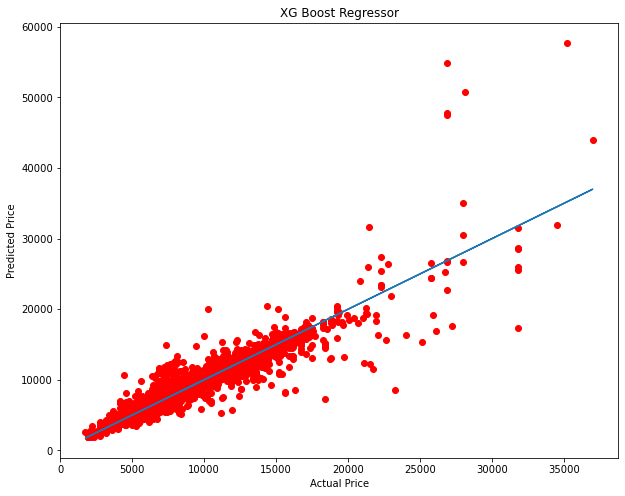

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=xgb1_pred,color='r')
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("XG Boost Regressor")
plt.show()

# Saving the Model

In [58]:
import pickle
filename='flight_price.pkl'
pickle.dump(xgb1,open(filename,'wb'))

# Loading Model

In [59]:
load_model=pickle.load(open('flight_price.pkl','rb'))

In [60]:
load_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=1, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [68]:
predictions=load_model.predict(flight_test)

In [69]:
predictions

array([ 9798.597 ,  4603.9834, 17760.086 , ..., 12730.907 , 11968.793 ,
        6353.0684], dtype=float32)

In [74]:
predictions=pd.DataFrame(predictions,columns=['Predictes Price'])

In [77]:
predictions.to_excel('predicted_flight_price.xlsx')